In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [1]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
X, y = mnist.data, mnist.target

In [8]:
y_3 = (y == '3')  # True if digit is 3, else False

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_3, test_size=0.2, random_state=42, stratify=y_3
)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [14]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)


In [15]:
y_pred_sgd = sgd_clf.predict(X_test)

conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
conf_matrix_sgd

array([[12337,   235],
       [  228,  1200]])

In [16]:
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

precision_sgd, recall_sgd, f1_sgd

(0.8362369337979094, 0.8403361344537815, 0.8382815228780999)

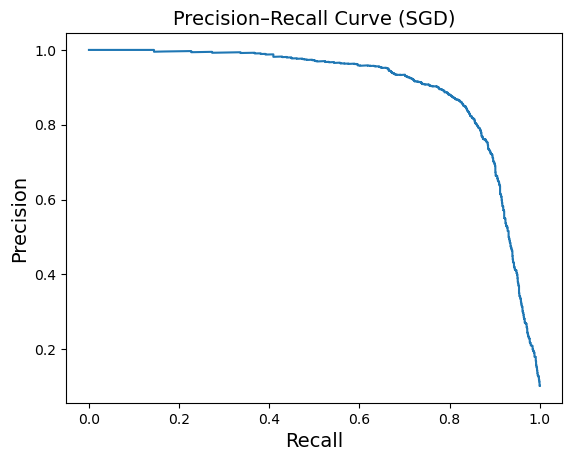

In [17]:
y_scores_sgd = sgd_clf.decision_function(X_test)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_sgd)

plt.figure()
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (SGD)")
plt.show()


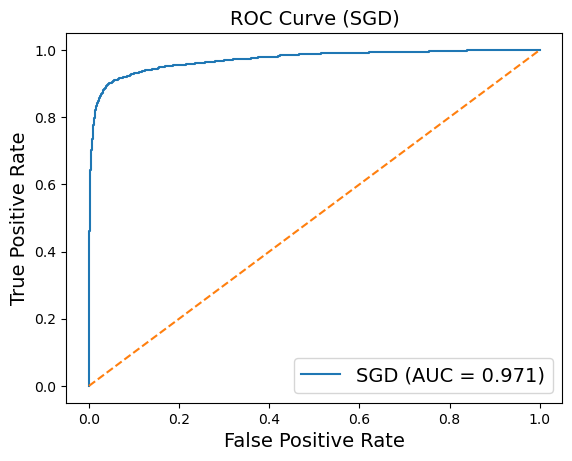

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores_sgd)
roc_auc_sgd = roc_auc_score(y_test, y_scores_sgd)

plt.figure()
plt.plot(fpr, tpr, label=f"SGD (AUC = {roc_auc_sgd:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SGD)")
plt.legend()
plt.show()


In [20]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

y_dummy_pred = dummy_clf.predict(X_test)
dummy_accuracy = dummy_clf.score(X_test, y_test)

dummy_accuracy


0.898

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [22]:
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

precision_rf, recall_rf, f1_rf, roc_auc_rf

(0.9959183673469387,
 0.8543417366946778,
 0.919713531850735,
 np.float64(0.9970899272849452))

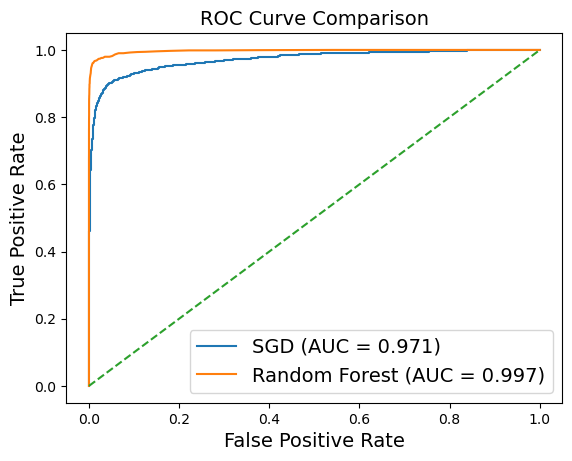

In [23]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure()
plt.plot(fpr, tpr, label=f"SGD (AUC = {roc_auc_sgd:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [24]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["SGD", "Random Forest"],
    "Precision": [precision_sgd, precision_rf],
    "Recall": [recall_sgd, recall_rf],
    "F1 Score": [f1_sgd, f1_rf],
    "ROC AUC": [roc_auc_sgd, roc_auc_rf]
})

results


,Model,Precision,Recall,F1 Score,ROC AUC
0,SGD,0.836237,0.840336,0.838282,0.971114
1,Random Forest,0.995918,0.854342,0.919714,0.997090


# Summary

This experiment reformulated the MNIST dataset as a binary classification problem, revealing the limitations of accuracy on imbalanced data. A DummyClassifier achieved high accuracy by predicting only the majority class, demonstrating the need for metrics such as precision, recall, F1 score, and ROC AUC. The SGD classifier showed high precision but lower recall, indicating that it missed many true positives despite being confident in its predictions. In contrast, the Random Forest classifier significantly outperformed SGD by achieving a better balance between precision and recall, resulting in higher F1 and ROC AUC scores. Overall, the results highlight the importance of appropriate evaluation metrics and show that non-linear models are more effective for handwritten digit classification.